In [110]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns 
##-- Machine Learning Models 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import os
sns.set()

In [71]:
df = pd.read_csv("C:/Users/priyank/Downloads/titanic.csv/titanic.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# 1. Shape of dataset 
df.shape

(891, 12)

In [6]:
# 2. Column schema information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# 3. Check missing values in dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# 4. Check statistical information about the data 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# 5. To check duplicated values in data 
df.duplicated().sum()

0

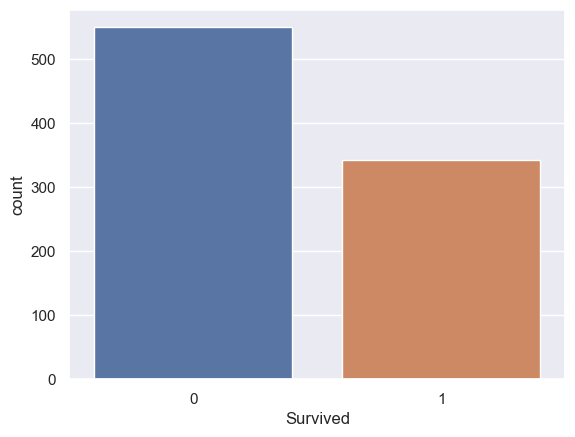

In [19]:
# 6.categorical variables 
sns.countplot(x='Survived',data=df)
plt.show()

# No. of males and males travelled

In [21]:
print("no. of males in the titanic:",df['Sex'].value_counts()['male'])
print("no. of females in the titanic:",df['Sex'].value_counts()['female'])
df['Survived'].value_counts()[df['Sex']=='male']
df['Survived'].value_counts()[df['Sex']=='female']

no. of males in the titanic: 577
no. of females in the titanic: 314


1    342
Name: Survived, dtype: int64

# Let visualise the survival rate in gender category using count plot

<AxesSubplot: xlabel='Survived', ylabel='count'>

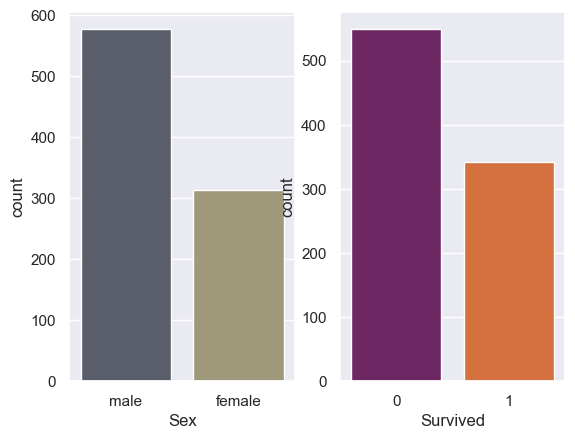

In [28]:
plt.subplot(1,2,1)
sns.countplot(x='Sex',data=df,palette='cividis')
plt.subplot(1,2,2)
sns.countplot(data=df,x='Survived',palette='inferno')

## Let's predict that equal proportion of people were killed by gender

<AxesSubplot: xlabel='Survived', ylabel='count'>

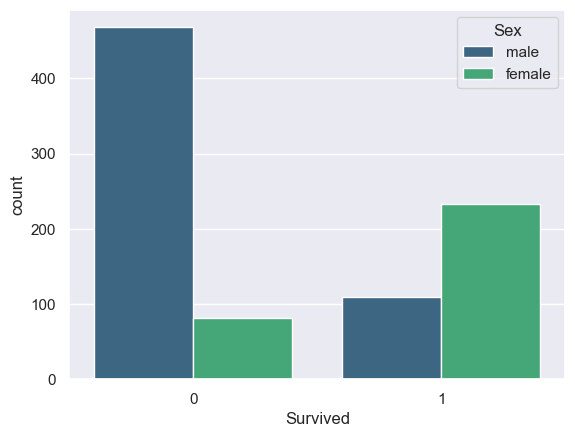

In [29]:
sns.countplot(x='Survived',data=df,palette='viridis',hue='Sex')

## people who were living in better passenger classes survived people living in lower class were remained dead

In [53]:
def fare_level(Fare):
    if Fare > 31.500000:
        return 'rich'
    elif Fare > 14.454200 and Fare < 31.000000:
        return 'middle-up'
    elif Fare > 7.895800 and Fare < 14.454200 :
        return 'middle-down'
    else:
        return 'poor'

In [54]:
df['fare_level'] = df.Fare.apply(fare_level)
df.drop('Fare', axis = 1, inplace = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,fare_level
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,NaN,S,poor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C85,C,rich
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,NaN,S,middle-down
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,C123,S,rich
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,NaN,S,middle-down
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,NaN,S,middle-down
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,B42,S,middle-up
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,NaN,S,middle-up
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,C148,C,middle-up


Changing Survived status 1 and 0 to 1= Survive and 0 = Dead

In [56]:
survived_dict = {
    1 : 'Survive',
    0 : 'Dead'
}
df['Survive'] = df.Survived.map(survived_dict)

In [57]:
dfare_level = df.groupby(['fare_level', 'Survive']).size().reset_index(name='Count')
dfare_level = dfare_level.rename(columns={'fare_level':'Fare_level', 'Survive':'Count'}).reset_index()
dfare_level

,index,Fare_level,Count,Count
0,0,middle-down,Dead,150
1,1,middle-down,Survive,67
2,2,middle-up,Dead,120
3,3,middle-up,Survive,99
4,4,poor,Dead,194
5,5,poor,Survive,50
6,6,rich,Dead,85
7,7,rich,Survive,126


In [63]:
labels = ['middle-down', 'middle-up','poor','rich']
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[67, 99, 50, 126], name="Survive"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[150, 120, 194, 126], name="Dead"),
              1, 2)

# Useing hole to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Survive Vs Dead",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Survive', x=0.15, y=0.5, font_size=20, showarrow=False),
                 dict(text='Dead', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()



# TRAIN TEST SPLIT

In [93]:
log_model = LogisticRegression(max_iter=1000)
random = RandomForestClassifier()
knn = KNeighborsClassifier()
gauss = GaussianNB()
d_tree = DecisionTreeClassifier()
svc = SVC()
models = [log_model,random,knn,gauss,d_tree,svc]

In [111]:
acc = []
for model in models:
    print(model,"\n")
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    print(classification_report(y_test,predictions))
    print("Confusion Matrix\n",confusion_matrix(y_test,predictions))
    acc = np.append(acc,accuracy_score(y_test,predictions))
    print("\n---------------------------------------------------------\n")

LogisticRegression(max_iter=1000) 

              precision    recall  f1-score   support

           0       0.70      0.94      0.81       134
           1       0.78      0.35      0.48        81

    accuracy                           0.72       215
   macro avg       0.74      0.64      0.64       215
weighted avg       0.73      0.72      0.68       215

Confusion Matrix
 [[126   8]
 [ 53  28]]

---------------------------------------------------------

RandomForestClassifier() 

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       134
           1       0.64      0.63      0.63        81

    accuracy                           0.73       215
   macro avg       0.71      0.71      0.71       215
weighted avg       0.72      0.73      0.73       215

Confusion Matrix
 [[105  29]
 [ 30  51]]

---------------------------------------------------------

KNeighborsClassifier() 

              precision    recall  f1-score   support

 

# Ave Score For All above Classifiers  

In [113]:
AveScore=accuracy_score(y_test,predictions)*100
print(AveScore)

68.83720930232559
